In [ ]:
# Phase 4: Wholesaler vs. Retail Customers

# In this section, we test the "Wholesaler Hypothesis".  
# The business suspects that some customers are "wholesalers" who purchase in bulk, while others are "regular retail buyers".

# We will:
# 1. Calculate each customer's total spending.
# 2. Plot spending distribution using a histogram and boxplot.
# 3. Identify and separate "low spenders (retail customers)"and "high spenders (wholesalers)".
# 4. Suggest different business strategies for these groups.


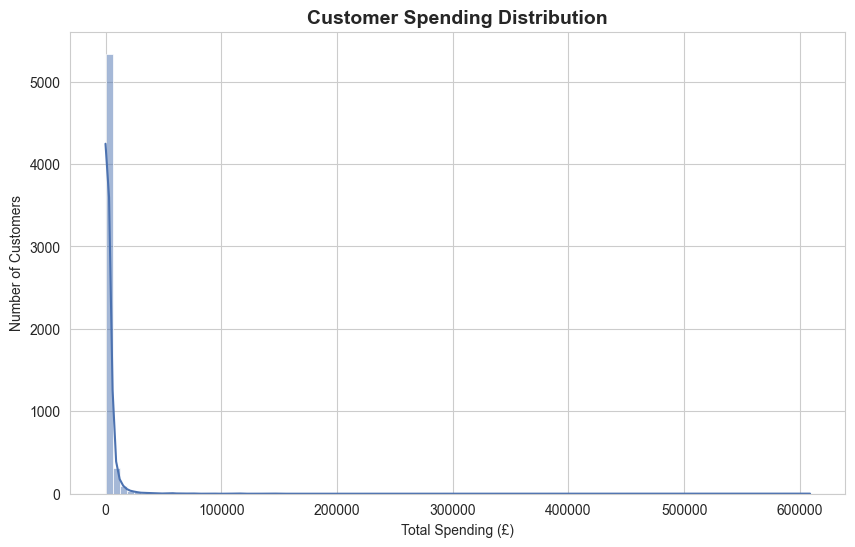

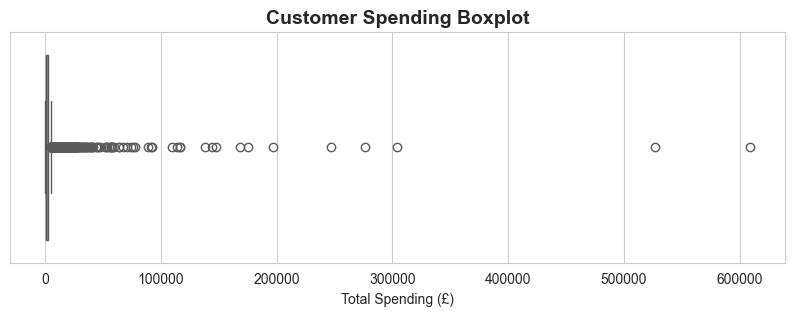

CustomerType
Retail        5266
Wholesaler     586
Name: count, dtype: int64

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import csv

#load the dataset
df = pd.read_csv('online_retail_cleaned.csv')  

# Group data by customer and calculate total spending
customer_spending = df.groupby('Customer ID')['TotalPrice'].sum().reset_index()

# Rename column for clarity
customer_spending.rename(columns={'TotalPrice': 'TotalSpending'}, inplace=True)

# Quick check
customer_spending.head()

# Use a clean style
sns.set_style("whitegrid")

# Histogram
plt.figure(figsize=(10,6))
sns.histplot(customer_spending['TotalSpending'], bins=100, kde=True, color="#4C72B0")
plt.title("Customer Spending Distribution", fontsize=14, weight='bold')
plt.xlabel("Total Spending (£)")
plt.ylabel("Number of Customers")
plt.show()

# Boxplot
plt.figure(figsize=(10,3))
sns.boxplot(x=customer_spending['TotalSpending'], color="#DD8452")
plt.title("Customer Spending Boxplot", fontsize=14, weight='bold')
plt.xlabel("Total Spending (£)")
plt.show()

# Find threshold for top 10% spenders
threshold = customer_spending['TotalSpending'].quantile(0.90)

# Add a customer type column
customer_spending['CustomerType'] = customer_spending['TotalSpending'].apply(
    lambda x: 'Wholesaler' if x >= threshold else 'Retail'
)

# Count how many in each group
customer_spending['CustomerType'].value_counts()
